# Steam Market Analysis Notebook

Working with Steam dataset fetched with the use of Steam Spy

## Preparation

In [1]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import ast
import seaborn as sns
import numpy as np

Importing dataset

In [2]:
details_df = pd.read_csv("details.csv", index_col=0)
timestamps_df = pd.read_csv("timestamps.csv", index_col=0)
details_df['price'] = details_df['price']/100

In [3]:
# Calculate the total number of reviews
details_df['total_reviews'] = details_df['positive'] + details_df['negative']

# Calculate the rate of positive reviews, handling the case where total_reviews is 0
details_df['user_score'] = np.where(details_df['total_reviews'] == 0, 0, details_df['positive'] / details_df['total_reviews'])
details_df.drop(['positive', 'negative'], axis=1, inplace=True)
details_df['languages'] = details_df['languages'].apply(ast.literal_eval)
details_df['genre'] = details_df['genre'].apply(ast.literal_eval)

details_df['num_languages'] = details_df['languages'].apply(len)
details_df['num_genres'] = details_df['genre'].apply(len)

details_df = details_df.loc[(details_df['total_reviews'] != 0) & (details_df['average_forever'] != 0) & (details_df['ccu'] != 0)]

timestamps_df.columns = pd.to_datetime(timestamps_df.columns)

In [4]:
details_df.count()

name               7202
developer          7181
publisher          7191
min_owners         7202
max_owners         7202
average_forever    7202
average_2weeks     7202
median_forever     7202
median_2weeks      7202
ccu                7202
price              7202
initialprice       7202
discount           7202
genre              7202
tags               7202
languages          7202
total_reviews      7202
user_score         7202
num_languages      7202
num_genres         7202
dtype: int64

In [5]:
timestamps_df

,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
570,75041.0,108689.0,118724.0,171860.0,169631.0,213521.0,260989.0,283870.0,325598.0,299667.0,...,752617.0,809580.0,711816.0,679525.0,702381.0,855495.0,777466.0,780443.0,767353.0,705063.0
730,1642.0,52261.0,36057.0,20850.0,50533.0,27553.0,31359.0,35238.0,32166.0,31966.0,...,1519457.0,1510231.0,1802853.0,1665869.0,1222913.0,1369511.0,1556326.0,1364902.0,1161043.0,1204943.0
578080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459344.0,444973.0,414957.0,376727.0,356738.0,397857.0,415099.0,444585.0,502374.0,468202.0
1063730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24140.0,28227.0,23468.0,20288.0,25878.0,20091.0,25912.0,77642.0,45836.0,30227.0
1172470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,603290.0,562634.0,584294.0,446463.0,349762.0,451223.0,452991.0,435229.0,438349.0,336802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Some graphs

Output top games by CCU (Concurrent users)

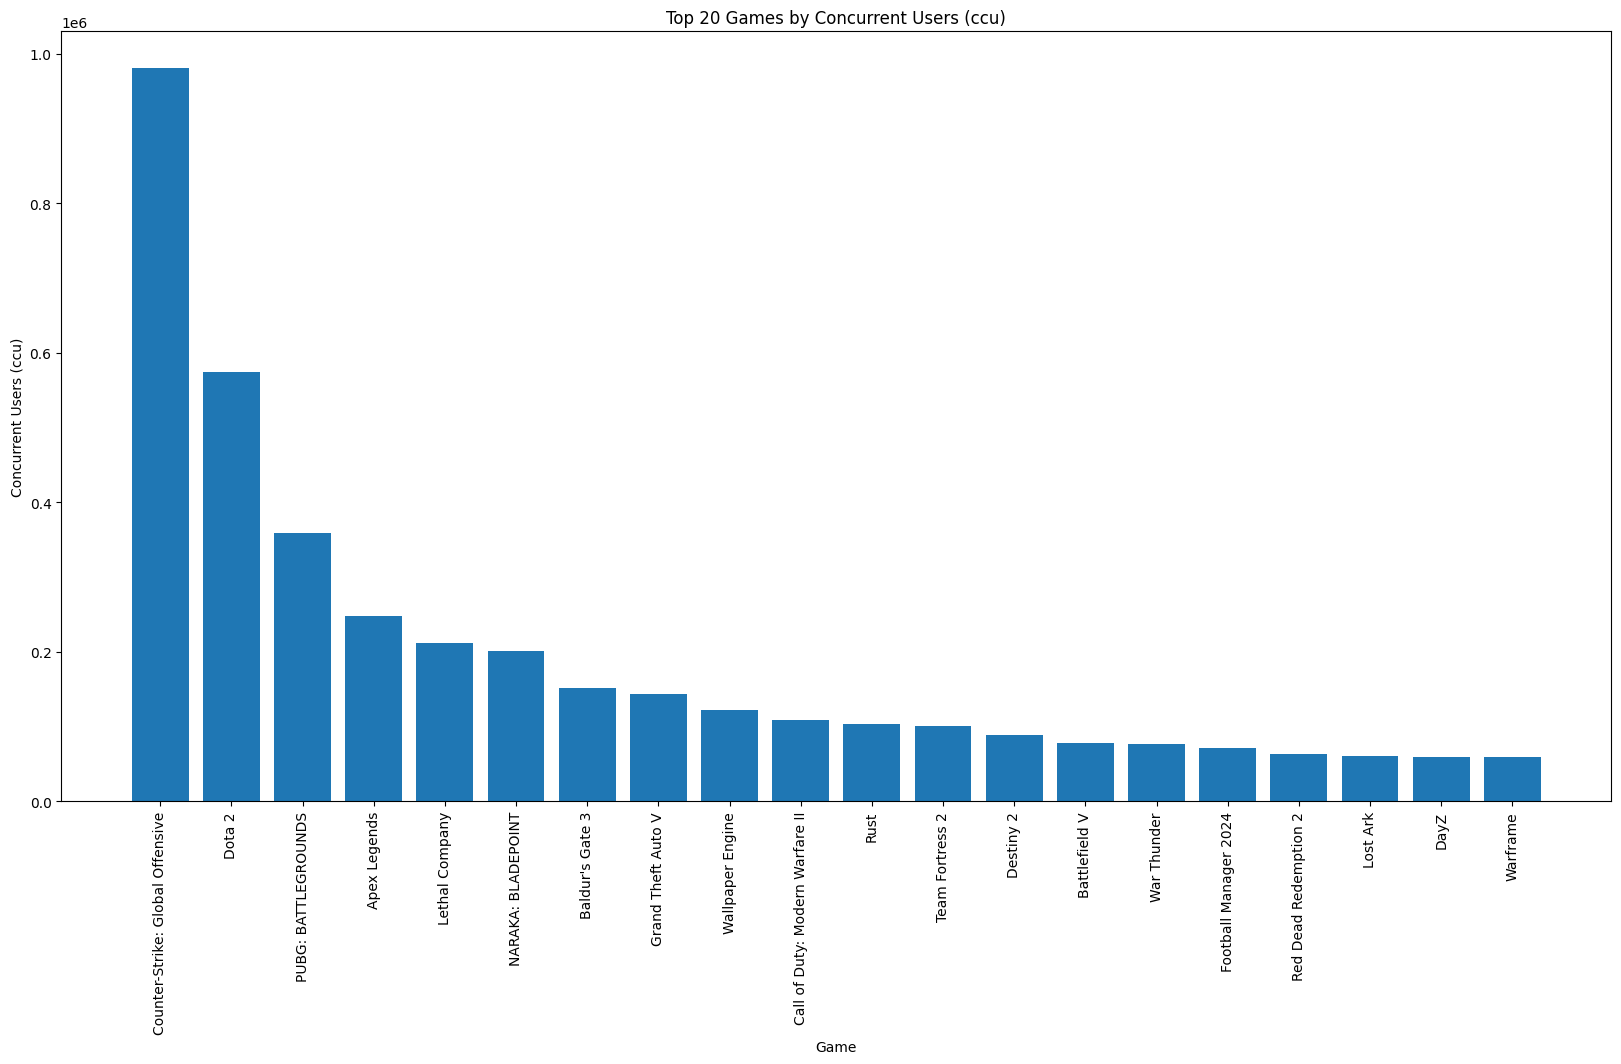

In [6]:
# Ensuring the 'name' column is treated as a string and plotting ccu for a subset of top games

# Converting 'name' column to string to avoid TypeError
details_df['name'] = details_df['name'].astype(str)

# Selecting the top 20 games based on concurrent users for a more manageable plot
top_games = details_df.nlargest(20, 'ccu')

plt.figure(figsize=(20, 10))
plt.bar(top_games['name'], top_games['ccu'])
plt.title("Top 20 Games by Concurrent Users (ccu)")
plt.xlabel("Game")
plt.ylabel("Concurrent Users (ccu)")
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()

Explore possible correlations between numeric values

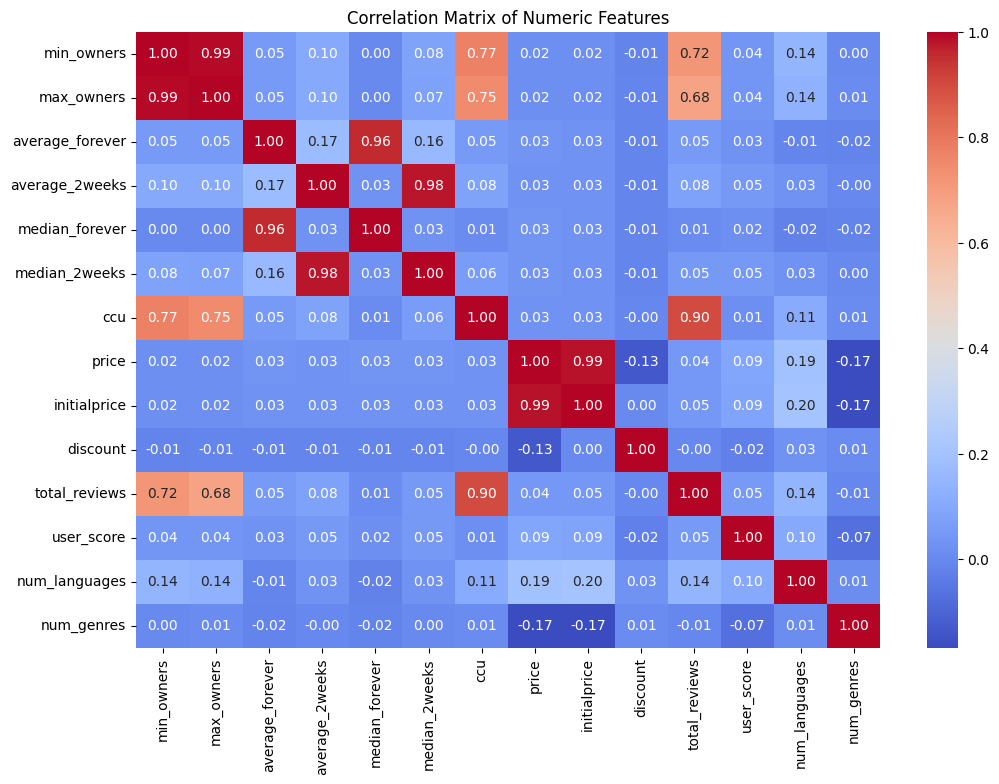

In [7]:
# Let's create a more interesting visualization by exploring correlations in the data

# For this, we'll focus on numerical columns and see how they are related to each other
numeric_columns = details_df.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Correlation Coefficients: Each cell in the heatmap contains a correlation coefficient that ranges from -1 to 1. This coefficient measures the strength and direction of the linear relationship between two numeric variables.

Positive Correlation (Close to +1): When two variables have a correlation coefficient close to +1, it indicates a strong positive correlation. This means that as one variable increases, the other variable tends to increase as well. For example, if the number of positive reviews (positive) and the number of concurrent users (ccu) have a high positive correlation, it suggests that games with more positive reviews tend to have more concurrent users.

Negative Correlation (Close to -1): A correlation coefficient close to -1 signifies a strong negative correlation. In this scenario, as one variable increases, the other tends to decrease. For instance, if there was a negative correlation between price (price) and the number of concurrent users (ccu), it would suggest that higher-priced games tend to have fewer concurrent users.

No Correlation (Close to 0): A coefficient near 0 implies that there is little or no linear relationship between the variables. This means changes in one variable do not necessarily correspond to changes in the other.

Color Coding: The heatmap uses color coding to visually represent the strength and direction of correlations. Typically, warm colors (like red) indicate positive correlations, and cool colors (like blue) indicate negative correlations. The intensity of the color corresponds to the strength of the correlation.

C:\Users\egorl\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


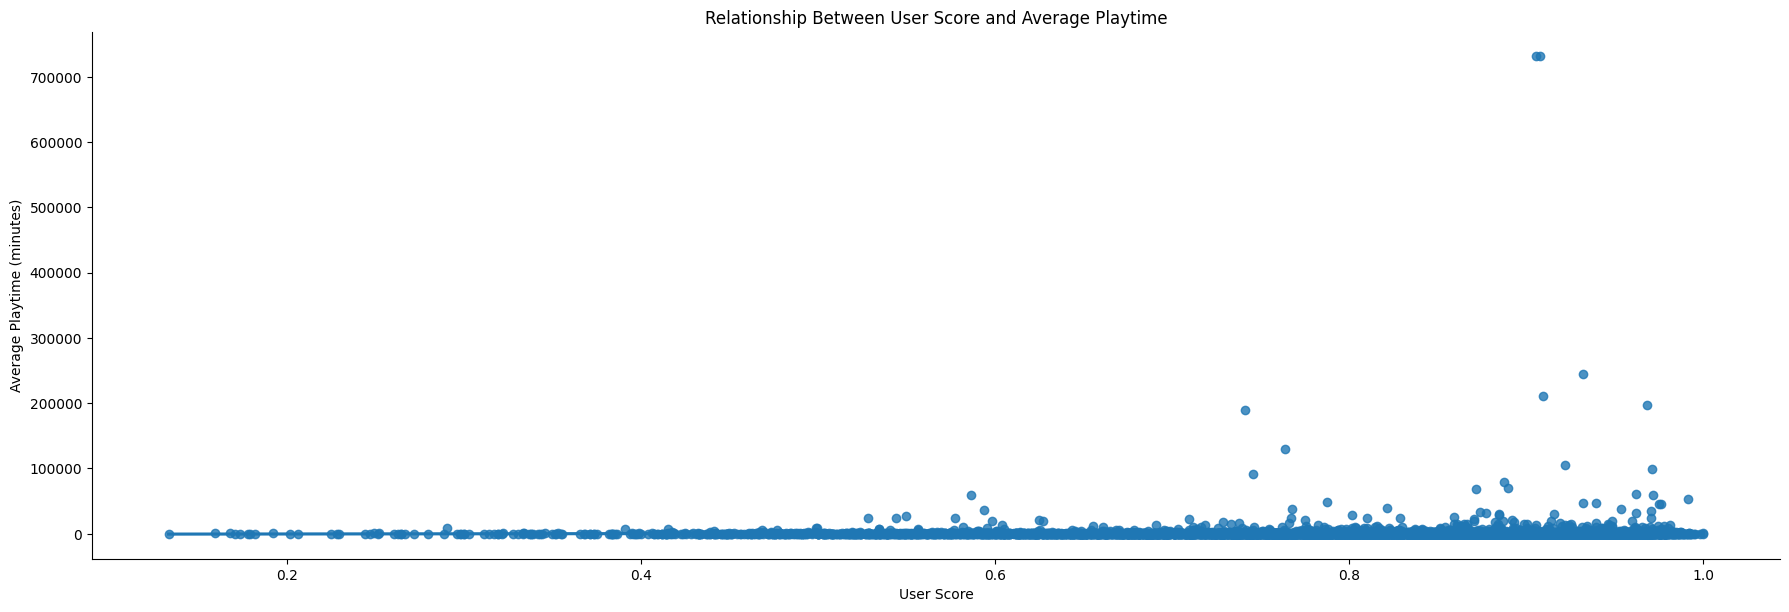

In [8]:
# Creating a scatter plot with a regression line for positive reviews vs average playtime

sns.lmplot(x='user_score', y='average_forever', data=details_df, aspect=3, height=6)
plt.title("Relationship Between User Score and Average Playtime")
plt.xlabel("User Score")
plt.ylabel("Average Playtime (minutes)")
plt.show()


Calculate the rate of languages considering their support in different games

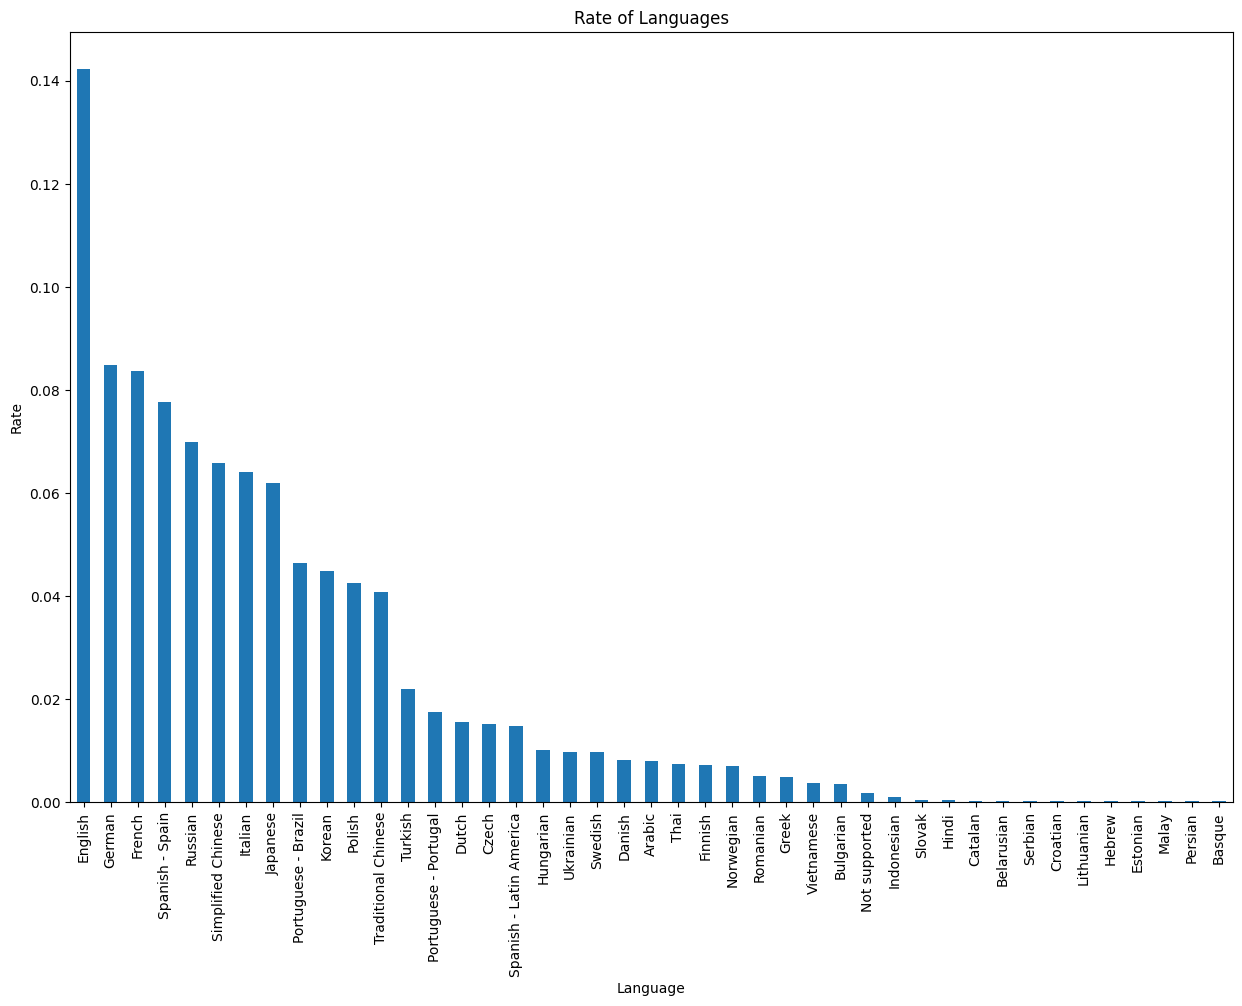

In [9]:
details_df_copy = details_df.copy()
# Flatten the list of languages and count the occurrences of each language
language_counts = details_df_copy['languages'].explode().value_counts()

# Calculate the rate of each language
language_rate = language_counts / language_counts.sum()
threshold = 0.0001  # Adjust this value based on your needs

# Keep only languages with a rate higher than the threshold
filtered_language_rate = language_rate[language_rate > threshold]

# Reverse the order of the data
#filtered_language_rate = filtered_language_rate.sort_values(ascending=True)

# Plot the rate of languages
plt.figure(figsize=(15, 10))
filtered_language_rate.plot(kind='bar')
plt.title('Rate of Languages')
plt.xlabel('Language')
plt.ylabel('Rate')
plt.show()


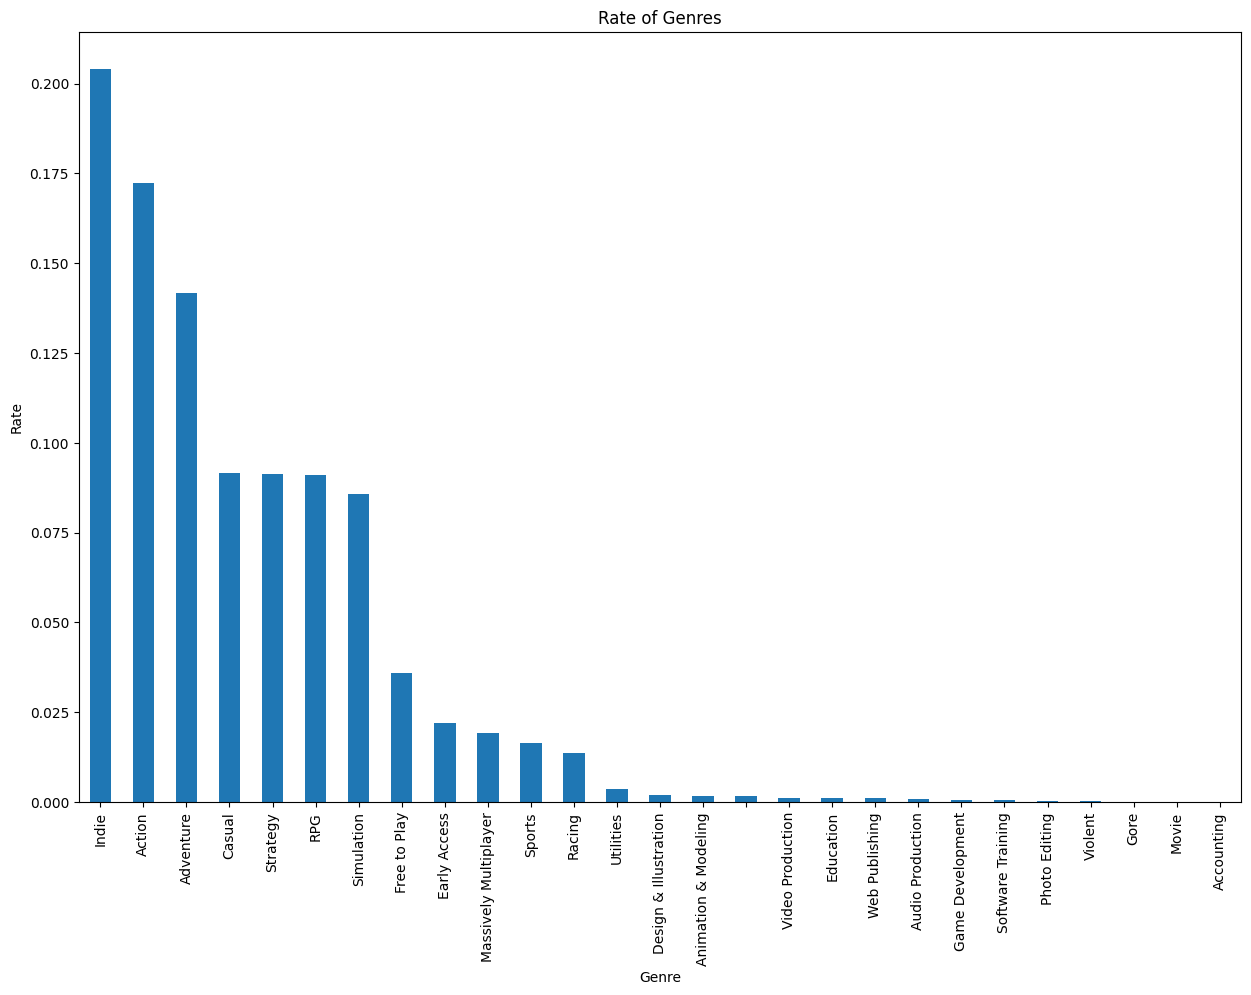

In [10]:
details_df_copy = details_df.copy()
details_df_copy = details_df.copy()
# Flatten the list of genres and count the occurrences of each genre
genre_counts = details_df_copy['genre'].explode().value_counts()

# Calculate the rate of each genre
genre_rate = genre_counts / genre_counts.sum()
threshold = 0  # Adjust this value based on your needs

# Keep only genres with a rate higher than the threshold
filtered_genre_rate = genre_rate[genre_rate > threshold]

# Reverse the order of the data
#filtered_genre_rate = filtered_genre_rate.sort_values(ascending=True)

# Plot the rate of genres
plt.figure(figsize=(15, 10))
filtered_genre_rate.plot(kind='bar')
plt.title('Rate of Genres')
plt.xlabel('Genre')
plt.ylabel('Rate')
plt.show()


Sum of peak activities since July 2012

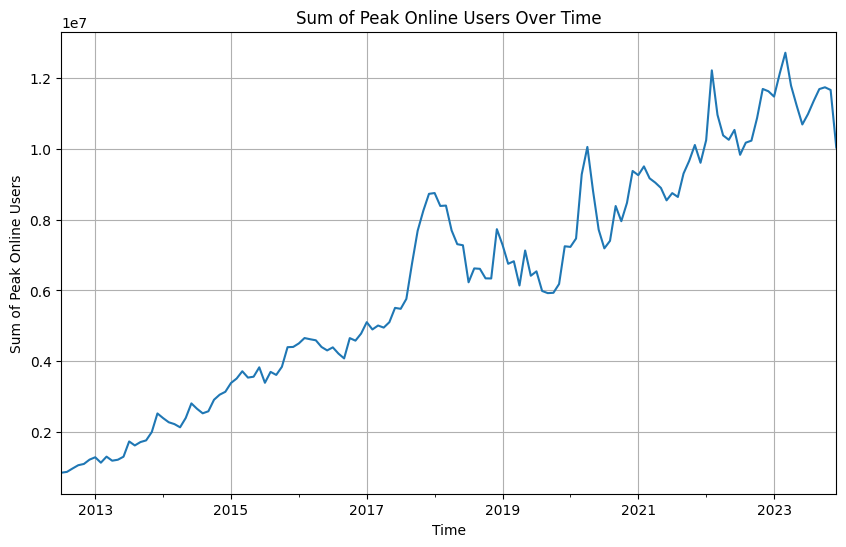

In [11]:
peak_activities = timestamps_df.sum(axis=0)
plt.figure(figsize=(10, 6))
peak_activities.plot(kind='line')
plt.title('Sum of Peak Online Users Over Time')
plt.xlabel('Time')
plt.ylabel('Sum of Peak Online Users')
plt.grid(True)
plt.show()

Sum of peak activities per month

C:\Users\egorl\AppData\Local\Temp\ipykernel_5676\1147095564.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_avg = timestamps_df.groupby(


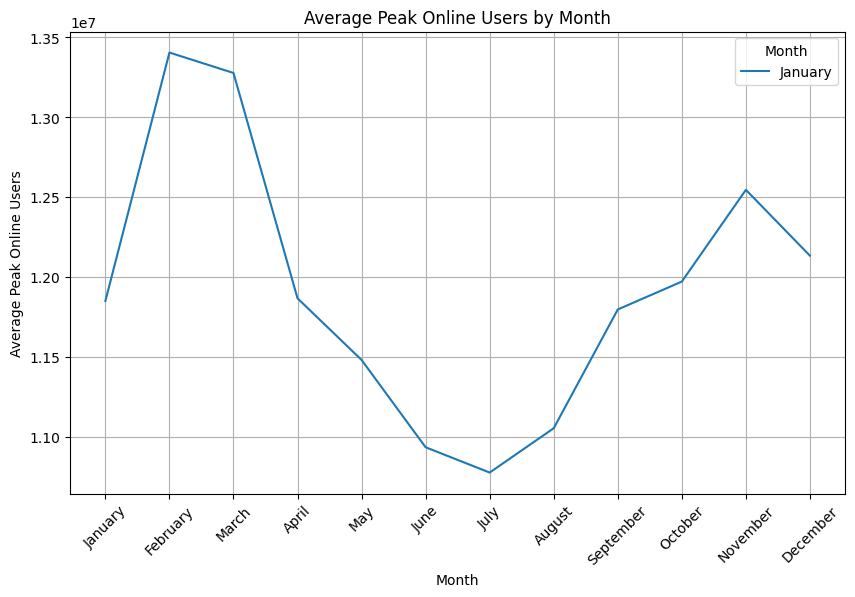

In [12]:
# Convert column names to datetime

monthly_avg = timestamps_df.groupby(
    timestamps_df.columns.month, axis=1).mean().sum(axis=0)  # FIXME????
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line')
plt.title('Average Peak Online Users by Month')
plt.xlabel('Month')
plt.ylabel('Average Peak Online Users')
plt.xticks(range(1, 13), month_names, rotation=45)
plt.legend(title='Month', labels=month_names)
plt.grid(True)
plt.show()

Popularity of games by ccu and by max peaks by all times:

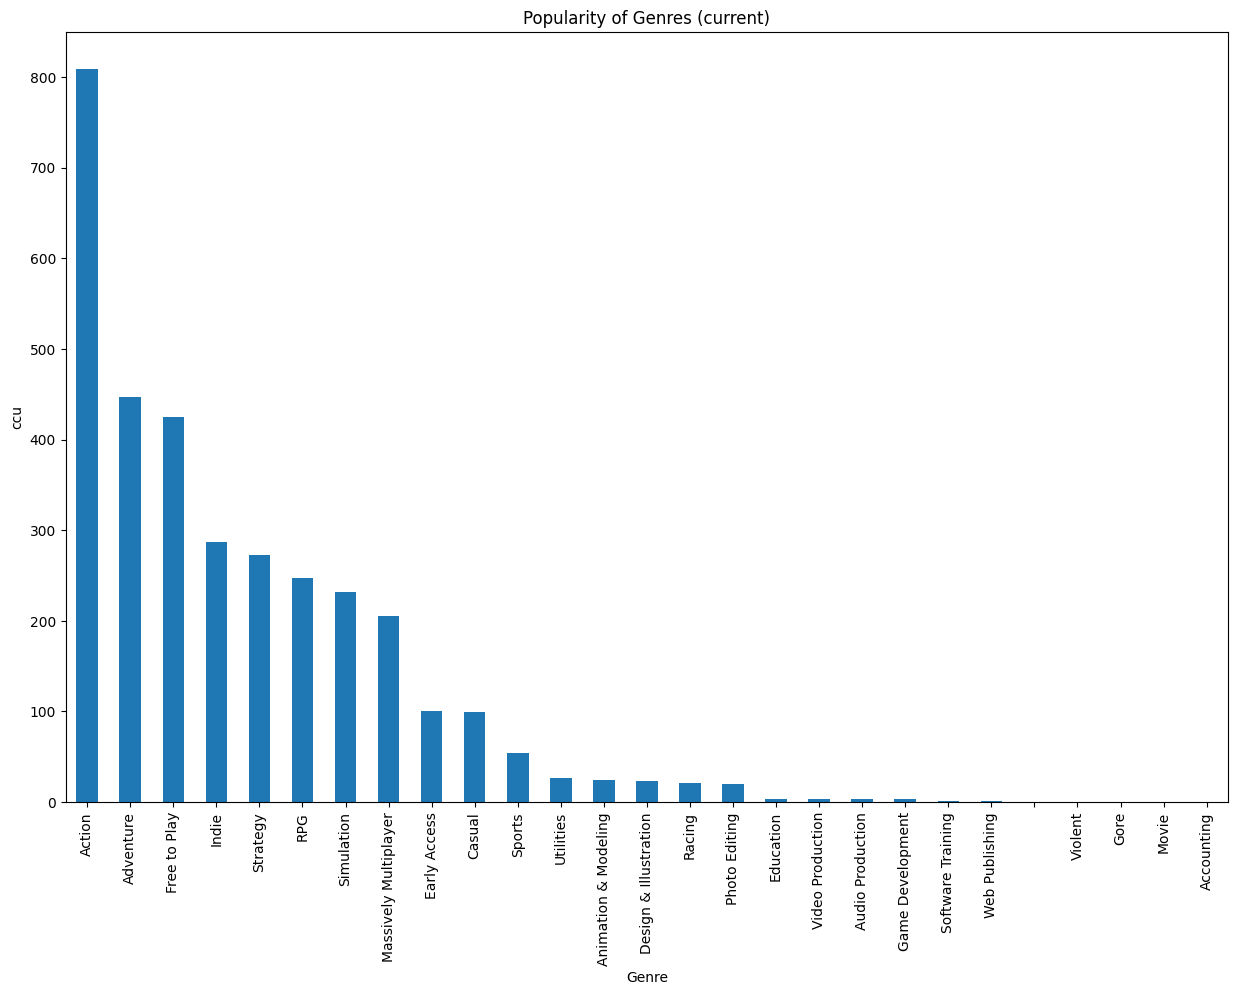

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb_genre = MultiLabelBinarizer()
genre_encoded = mlb_genre.fit_transform(details_df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb_genre.classes_, index=details_df.index)


# mlb_tags = MultiLabelBinarizer()
# tags_encoded = mlb_tags.fit_transform(details_df['tags'])
# tags_df = pd.DataFrame(tags_encoded, columns=mlb_tags.classes_, index=details_df.index)

# mlb_languages = MultiLabelBinarizer()
# languages_encoded = mlb_languages.fit_transform(details_df['languages'])
# languages_df = pd.DataFrame(languages_encoded, columns=mlb_languages.classes_, index=details_df.index)



result_df = genre_df.multiply(details_df['ccu'], axis='index')
most_popular_genres = result_df.mean(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15, 10))
most_popular_genres.plot(kind='bar')
plt.title('Popularity of Genres (current)')
plt.xlabel('Genre')
plt.ylabel('ccu')
plt.show()

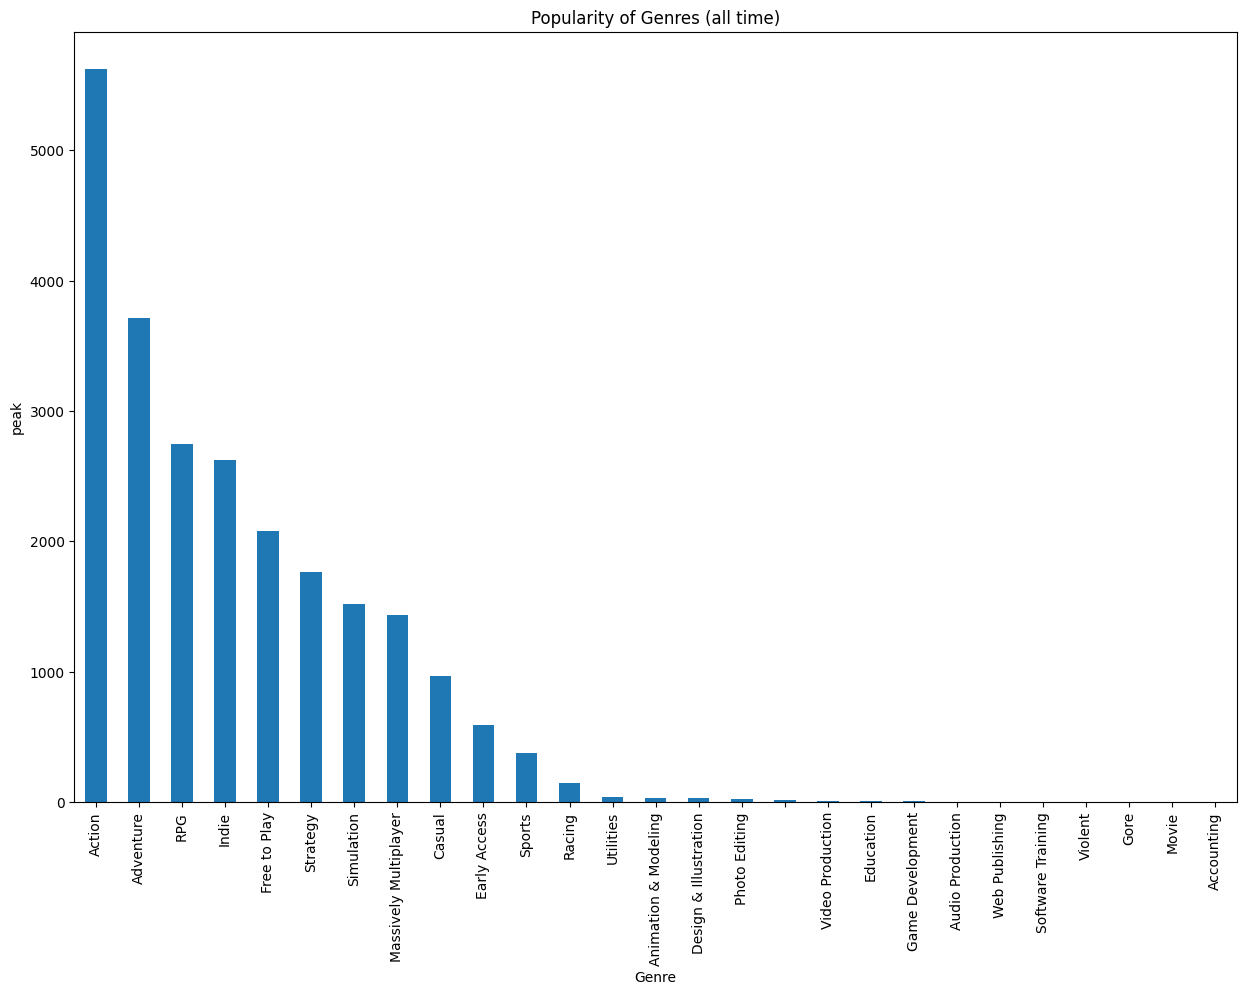

In [43]:
row_max = timestamps_df.max(axis=1)
row_maxes_df = pd.DataFrame(row_max, columns=['max'])


result_df = genre_df.multiply(row_maxes_df['max'], axis='index')
most_popular_genres = result_df.mean(axis=0).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
most_popular_genres.plot(kind='bar')
plt.title('Popularity of Genres (all time)')
plt.xlabel('Genre')
plt.ylabel('peak')
plt.show()